In [1]:
import pandas as pd
import matplotlib
import geopandas
from matplotlib import pyplot as plt
import math 
from math import sin, cos, asin, sqrt, pi

In [2]:
wm = geopandas.read_file("zip://data/WaterMains.zip")

In [3]:
sqrt((wm["geometry"][0].bounds[2]-wm["geometry"][0].bounds[0])**2+(wm["geometry"][0].bounds[3]-wm["geometry"][0].bounds[1])**2)

3.6467947610708293

In [4]:
df = pd.read_csv("material_len_count.csv")

In [5]:
df = df.astype({"perc_broken_len":str,"perc_broken_count":str})

In [6]:
df.sort_values(by = "total_len",ascending = False,inplace = True)

In [7]:
df = df.reset_index().drop(["index"],axis = 1)

In [8]:
df

,Material,total_len,total_count,broken_len,broken_count,perc_broken_len,perc_broken_count
0,DI,2.859948e+06,14972,1.763747e+05,404,6.17,2.7
1,CI,8.725389e+05,2861,1.099413e+06,1898,126.0,66.34
2,SPUN,4.266116e+05,1441,4.668064e+05,855,109.42,59.33
3,SAND,3.819481e+05,2064,1.363203e+05,371,35.69,17.97
4,CIPP,4.674893e+04,147,0.000000e+00,0,0.0,0.0
5,PVC,4.664843e+04,212,3.358369e+03,10,7.2,4.72
6,COPPER,1.448900e+04,153,4.700116e+02,4,3.24,2.61
7,HDPE,9.811240e+03,31,0.000000e+00,0,0.0,0.0


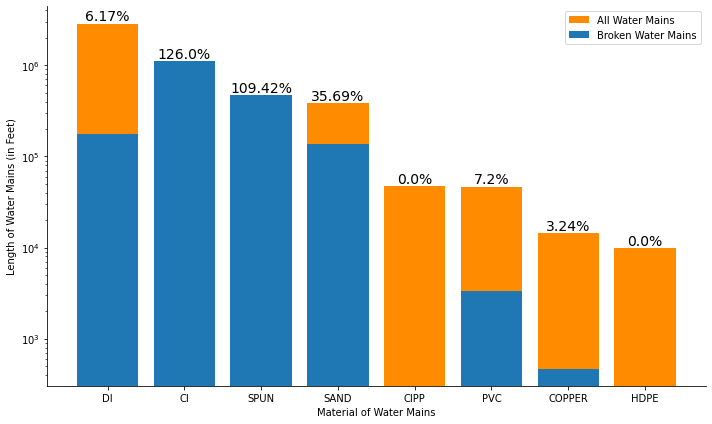

In [9]:
fig,ax = plt.subplots(figsize = (10,6))
total = plt.bar(x=df["Material"],height = df["total_len"],color = "darkorange",log = True)
broken = plt.bar(x=df["Material"],height = df["broken_len"],log = True)
#material.plot.bar(y="Material",ax=ax)
#material.plot.bar(y="broken",ax=ax,color = "orange")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for idx,rect in enumerate(total):
    if idx == 1 or idx == 2:
        continue
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_len"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
for idx,rect in enumerate(broken):
    if idx == 1 or idx == 2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height+0.2,
                df["perc_broken_len"][idx]+"%",
                ha='center', va='bottom', rotation=0,fontsize = 14)
ax.set_xlabel("Material of Water Mains")
ax.set_ylabel("Length of Water Mains (in Feet)")
ax.legend(["All Water Mains","Broken Water Mains"])
plt.tight_layout()
#plt.savefig("Material of Water Mains.pdf")

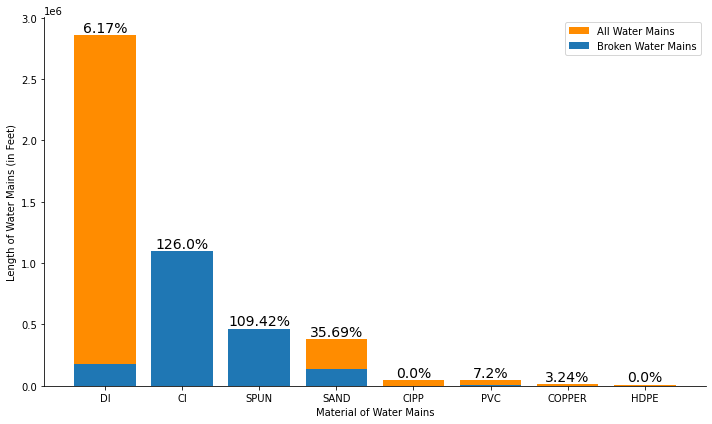

In [10]:
fig,ax = plt.subplots(figsize = (10,6))
total = plt.bar(x=df["Material"],height = df["total_len"],color = "darkorange")
broken = plt.bar(x=df["Material"],height = df["broken_len"])
#material.plot.bar(y="Material",ax=ax)
#material.plot.bar(y="broken",ax=ax,color = "orange")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for idx,rect in enumerate(total):
    if idx == 1 or idx == 2:
        continue
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_len"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
for idx,rect in enumerate(broken):
    if idx == 1 or idx == 2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height+0.2,
                df["perc_broken_len"][idx]+"%",
                ha='center', va='bottom', rotation=0,fontsize = 14)
ax.set_xlabel("Material of Water Mains")
ax.set_ylabel("Length of Water Mains (in Feet)")
ax.legend(["All Water Mains","Broken Water Mains"])
plt.tight_layout()
#plt.savefig("Material of Water Mains.pdf")

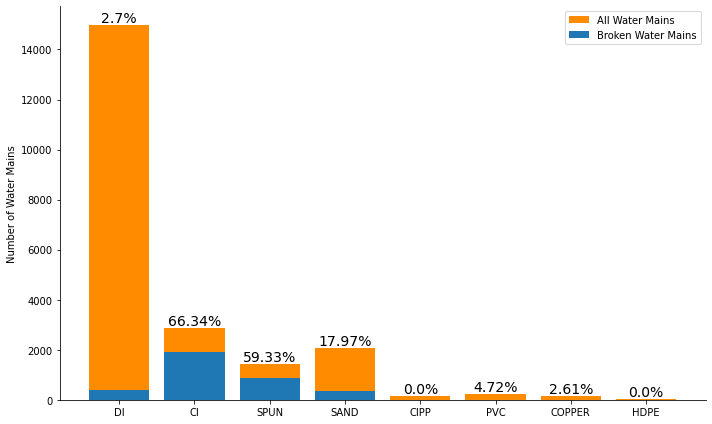

In [11]:
fig,ax = plt.subplots(figsize = (10,6))
total = plt.bar(x=df["Material"],height = df["total_count"],color = "darkorange")
broken = plt.bar(x=df["Material"],height = df["broken_count"])
#material.plot.bar(y="Material",ax=ax)
#material.plot.bar(y="broken",ax=ax,color = "orange")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for idx,rect in enumerate(total):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_count"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
ax.set_ylabel("Number of Water Mains")
ax.legend(["All Water Mains","Broken Water Mains"])
plt.tight_layout()
#plt.savefig("Material of Water Mains.pdf")

In [12]:
matplotlib.rcParams.update({"font.size":16})

In [13]:
df["total_count"] = df["total_count"]/1000
df["broken_count"] = df["broken_count"]/1000
df

,Material,total_len,total_count,broken_len,broken_count,perc_broken_len,perc_broken_count
0,DI,2.859948e+06,14.972,1.763747e+05,0.404,6.17,2.7
1,CI,8.725389e+05,2.861,1.099413e+06,1.898,126.0,66.34
2,SPUN,4.266116e+05,1.441,4.668064e+05,0.855,109.42,59.33
3,SAND,3.819481e+05,2.064,1.363203e+05,0.371,35.69,17.97
4,CIPP,4.674893e+04,0.147,0.000000e+00,0.000,0.0,0.0
5,PVC,4.664843e+04,0.212,3.358369e+03,0.010,7.2,4.72
6,COPPER,1.448900e+04,0.153,4.700116e+02,0.004,3.24,2.61
7,HDPE,9.811240e+03,0.031,0.000000e+00,0.000,0.0,0.0


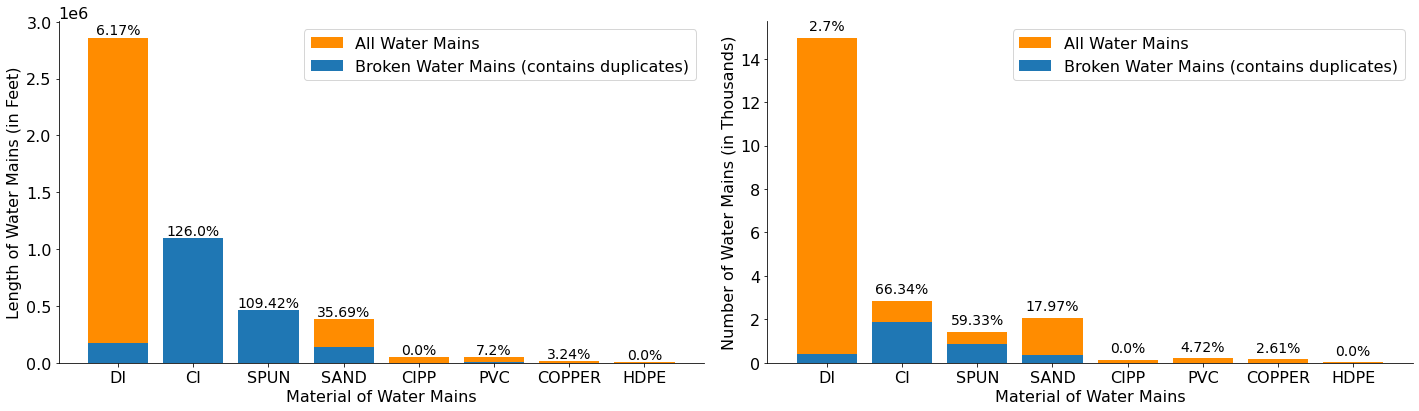

In [19]:
fig,axes = plt.subplots(ncols = 2,figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
total = ax1.bar(x=df["Material"],height = df["total_len"],color = "darkorange")
broken = ax1.bar(x=df["Material"],height = df["broken_len"])
for idx,rect in enumerate(total):
    if idx == 1 or idx == 2:
        continue
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_len"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
for idx,rect in enumerate(broken):
    if idx == 1 or idx == 2:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2, height+0.2,
                df["perc_broken_len"][idx]+"%",
                ha='center', va='bottom', rotation=0,fontsize = 14)
total = ax2.bar(x=df["Material"],height = df["total_count"],color = "darkorange")
broken = ax2.bar(x=df["Material"],height = df["broken_count"])
for idx,rect in enumerate(total):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_count"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Material of Water Mains")
    ax.legend(["All Water Mains","Broken Water Mains (contains duplicates)"])
ax1.set_ylabel("Length of Water Mains (in Feet)")
ax2.set_ylabel("Number of Water Mains (in Thousands)")
plt.tight_layout()
#plt.savefig("Material by len and count.pdf")

In [21]:
df["total_len"] = df["total_len"]/5280

,Material,total_len,total_count,broken_len,broken_count,perc_broken_len,perc_broken_count
0,DI,541.656726,14.972,1.763747e+05,0.404,6.17,2.7
1,CI,165.253581,2.861,1.099413e+06,1.898,126.0,66.34
2,SPUN,80.797655,1.441,4.668064e+05,0.855,109.42,59.33
3,SAND,72.338647,2.064,1.363203e+05,0.371,35.69,17.97
4,CIPP,8.853963,0.147,0.000000e+00,0.000,0.0,0.0
5,PVC,8.834930,0.212,3.358369e+03,0.010,7.2,4.72
6,COPPER,2.744128,0.153,4.700116e+02,0.004,3.24,2.61
7,HDPE,1.858189,0.031,0.000000e+00,0.000,0.0,0.0


In [23]:
df["broken_len"] = df["broken_len"]/5280
df

,Material,total_len,total_count,broken_len,broken_count,perc_broken_len,perc_broken_count
0,DI,541.656726,14.972,33.404299,0.404,6.17,2.7
1,CI,165.253581,2.861,208.222092,1.898,126.0,66.34
2,SPUN,80.797655,1.441,88.410304,0.855,109.42,59.33
3,SAND,72.338647,2.064,25.818241,0.371,35.69,17.97
4,CIPP,8.853963,0.147,0.000000,0.000,0.0,0.0
5,PVC,8.834930,0.212,0.636055,0.010,7.2,4.72
6,COPPER,2.744128,0.153,0.089017,0.004,3.24,2.61
7,HDPE,1.858189,0.031,0.000000,0.000,0.0,0.0


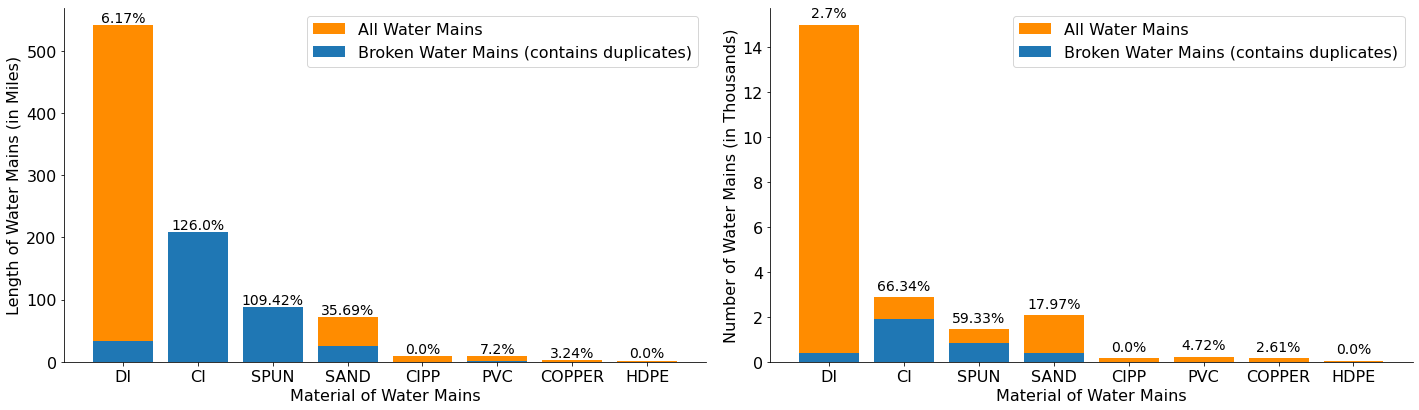

In [31]:
fig,axes = plt.subplots(ncols = 2,figsize = (20,6))
ax1 = axes[0]
ax2 = axes[1]
total = ax1.bar(x=df["Material"],height = df["total_len"],color = "darkorange")
broken = ax1.bar(x=df["Material"],height = df["broken_len"])
for idx,rect in enumerate(total):
    if idx == 1 or idx == 2:
        continue
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_len"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
for idx,rect in enumerate(broken):
    if idx == 1 or idx == 2:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2, height+0.2,
                df["perc_broken_len"][idx]+"%",
                ha='center', va='bottom', rotation=0,fontsize = 14)
total = ax2.bar(x=df["Material"],height = df["total_count"],color = "darkorange")
broken = ax2.bar(x=df["Material"],height = df["broken_count"])
for idx,rect in enumerate(total):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height+0.2,
            df["perc_broken_count"][idx]+"%",
            ha='center', va='bottom', rotation=0,fontsize = 14)
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Material of Water Mains")
    ax.legend(["All Water Mains","Broken Water Mains (contains duplicates)"])
ax1.set_ylabel("Length of Water Mains (in Miles)")
ax2.set_ylabel("Number of Water Mains (in Thousands)")
plt.tight_layout()
#plt.savefig("Material by len and count.pdf")

In [16]:
21.338/21.881

0.9751839495452677

In [17]:
3.528/3.542

0.9960474308300395

In [26]:
new_df = pd.read_csv("material_len_count.csv")

In [27]:
new_df

,Material,total_len,total_count,broken_len,broken_count,perc_broken_len,perc_broken_count
0,CI,8.725389e+05,2861,1.099413e+06,1898,126.00,66.34
1,SPUN,4.266116e+05,1441,4.668064e+05,855,109.42,59.33
2,SAND,3.819481e+05,2064,1.363203e+05,371,35.69,17.97
3,PVC,4.664843e+04,212,3.358369e+03,10,7.20,4.72
4,DI,2.859948e+06,14972,1.763747e+05,404,6.17,2.70
5,COPPER,1.448900e+04,153,4.700116e+02,4,3.24,2.61
6,CIPP,4.674893e+04,147,0.000000e+00,0,0.00,0.00
7,HDPE,9.811240e+03,31,0.000000e+00,0,0.00,0.00


In [29]:
#df.to_csv("material_len_count.csv")

In [30]:
new_df = pd.read_csv("material_len_count.csv")
new_df

,Unnamed: 0,Material,total_len,total_count,broken_len,broken_count,perc_broken_len,perc_broken_count
0,0,DI,541.656726,14.972,33.404299,0.404,6.17,2.70
1,1,CI,165.253581,2.861,208.222092,1.898,126.00,66.34
2,2,SPUN,80.797655,1.441,88.410304,0.855,109.42,59.33
3,3,SAND,72.338647,2.064,25.818241,0.371,35.69,17.97
4,4,CIPP,8.853963,0.147,0.000000,0.000,0.00,0.00
5,5,PVC,8.834930,0.212,0.636055,0.010,7.20,4.72
6,6,COPPER,2.744128,0.153,0.089017,0.004,3.24,2.61
7,7,HDPE,1.858189,0.031,0.000000,0.000,0.00,0.00
